# **PDS PROJECT - HEART DATA ANALYSIS**



* ###    **`1911004 - NIDHI BHANUSHALI`**
* ###  **`1911016 - KASHISH HARISIGHANI`**
* ###  **`1911053 - DISHA SHAH`**



[heart.csv](https://https://raw.githubusercontent.com/nidhi-bhanushali-3/pds-heart-analysis/main/heart.csv)

In [1]:
import numpy as np
import pandas as pd
import urllib3
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')



In [2]:
#df=pd.read_csv("heart.csv")                                                                                               #if using jupyter
df=pd.read_csv("https://raw.githubusercontent.com/nidhi-bhanushali-3/pds-heart-analysis/main/heart.csv")                  #if using colab/jupyter
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape
l=[]
for i in range(1,304):
    l.append(i)
df['index']=l
df.set_index('index',inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
index,,,,,,,,,,,,,,
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


In [6]:
#df.isnull().value_counts()---not working with jupyter notebook
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [7]:
df.loc[df['ca']==4,'ca']=np.NaN #ranges from 0-3 so 4 is a null value
df.loc[df['thal']==0,'thal']=np.NaN #ranges from 1-3 so 0 is a null value

In [8]:
# to check missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

In [9]:
#replacing NaN with median
df = df.fillna(df.median())
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.loc[(df.age>=45) & (df.sex==1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
index,,,,,,,,,,,,,,
1,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0.0,1.0,1
9,52,1,2,172,199,1,1,162,0,0.5,2,0.0,3.0,1
10,57,1,2,150,168,0,1,174,0,1.6,2,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,1,0,140,187,0,0,144,1,4.0,2,2.0,3.0,0
298,59,1,0,164,176,1,0,90,0,1.0,1,2.0,1.0,0
300,45,1,3,110,264,0,1,132,0,1.2,1,0.0,3.0,0


In [11]:
#check for duplicate values in dataset
duplicated=df.duplicated().sum()
if duplicated:
    print("Duplicate rows in dataset are : {}".format(duplicated))
else:
    print("Dataset contains no duplicate values")        

Duplicate rows in dataset are : 1


In [12]:
duplicated=df[df.duplicated(keep=False)]
duplicated.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
index,,,,,,,,,,,,,,
164,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1
165,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1


In [13]:
# change the categorical type to categorical variables
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['ca'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object')
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [14]:
# change the labelling for better interpretation/ visualization understanding
df['target'] = df.target.replace({1: "Disease", 0: "No_disease"})
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['cp'] = df.cp.replace({0: "typical_angina", 
                          1: "atypical_angina", 
                          2:"non-anginal pain",
                          3: "asymtomatic"})
df['exang'] = df.exang.replace({1: "Yes", 0: "No"})
df['fbs'] = df.fbs.replace({1: "True", 0: "False"})
df['slope'] = df.slope.replace({0: "upsloping", 1: "flat",2:"downsloping"})
df['thal'] = df.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})


age             AxesSubplot(0.08,0.536818;0.106098x0.343182)
trestbps    AxesSubplot(0.207317,0.536818;0.106098x0.343182)
chol        AxesSubplot(0.334634,0.536818;0.106098x0.343182)
thalach     AxesSubplot(0.461951,0.536818;0.106098x0.343182)
oldpeak     AxesSubplot(0.589268,0.536818;0.106098x0.343182)
dtype: object

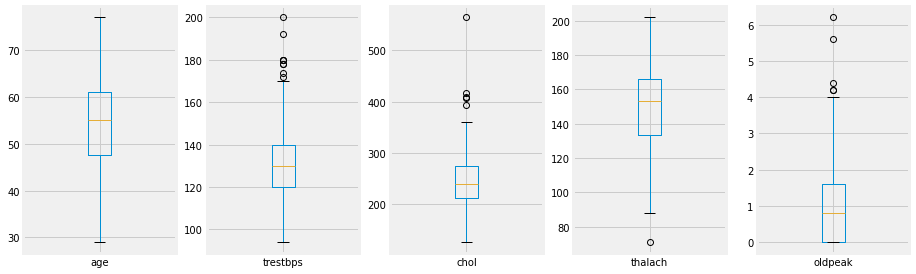

In [15]:
#Check for outliers
cat = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
df[[i for i in df.columns if i not in cat]].plot(kind='box', subplots=True, layout=(2,7),figsize=(20, 10))

In [16]:
#Removing outliers
df=df.loc[(df.trestbps<=169) & (df.chol<=352) & (df.oldpeak<=3.5) & (df.ca<=2) & (df.thalach>=95)]
#df.plot(kind='box', subplots=True, layout=(2,7),figsize=(20, 10));

In [17]:
df.loc[0:15,'sex':'trestbps'] #here both are included 

,sex,cp,trestbps
index,,,
1,Male,asymtomatic,145
2,Male,non-anginal pain,130
3,Female,atypical_angina,130
4,Male,atypical_angina,120
6,Male,typical_angina,140
7,Female,atypical_angina,140
8,Male,atypical_angina,120
10,Male,non-anginal pain,150
11,Male,typical_angina,140


In [18]:
# to know the basic stats
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,253.000000,253.000000,253.000000,253.000000,253.000000
mean,53.383399,128.478261,239.928854,151.620553,0.857312
std,9.117794,14.345113,42.706395,22.241243,0.949183
min,29.000000,94.000000,126.000000,95.000000,0.000000
25%,46.000000,120.000000,208.000000,138.000000,0.000000
50%,54.000000,130.000000,239.000000,156.000000,0.600000
75%,60.000000,140.000000,269.000000,169.000000,1.400000
max,76.000000,160.000000,342.000000,202.000000,3.500000


# Visualisation of the dataset

Disease       153
No_disease    100
Name: target, dtype: int64


Text(0.5, 1.0, 'Heart Disease Classes')

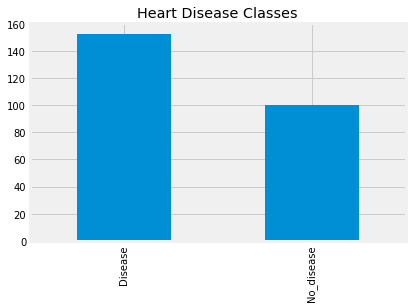

In [19]:
#bar plot for heart disease classes-based on the target column counts
print(df.target.value_counts())
df['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

<b>From the above analysis it can be inferred that more number of people suffer from the disease</b>

Text(0.5, 1.0, 'Age Distribution')

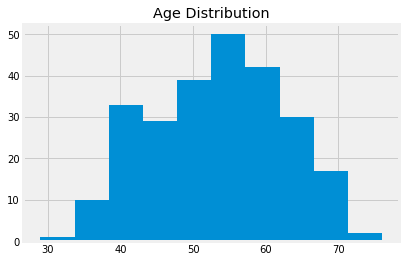

In [20]:
# Analyze distribution of age
df['age'].hist().plot(kind='bar')
plt.title('Age Distribution')

<b>Most of the patients are between 50 and 60 years of age.Range of age lies 29 years to 76 years. It can also be seen that the histogram is left skewed</b>

In [21]:
# to know the youngest or oldest in age
print(min(df.age)) #youngest
print(max(df.age)) #oldest
print(df.age.mean())

29
76
53.383399209486164


Male      174
Female     79
Name: sex, dtype: int64


Text(0.5, 1.0, 'sex Distribution')

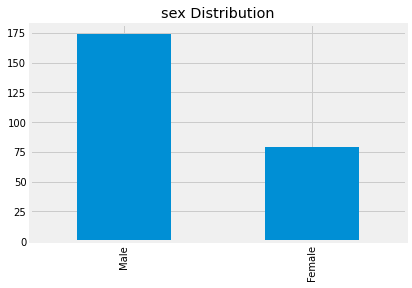

In [22]:
#count of male and female-sex distribution
print(df.sex.value_counts())
df['sex'].value_counts().plot(kind='bar').set_title('sex Distribution')


<b>Males suffer more from the disease than females.</b>

typical_angina      110
non-anginal pain     76
atypical_angina      48
asymtomatic          19
Name: cp, dtype: int64


Text(0.5, 1.0, 'Chest Pain Distribution')

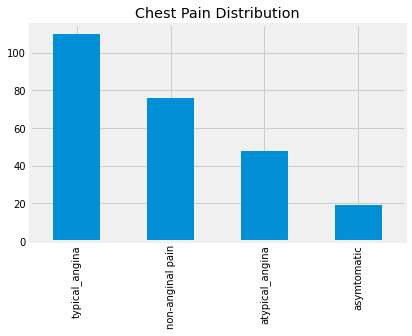

In [23]:
print(df.cp.value_counts())
df['cp'].value_counts().plot(kind='bar').set_title('Chest Pain Distribution')

<b>More number of patients have a typical chest pain</b>

## Count or distribution of diseases in dataset

1    134
0    117
2      2
Name: restecg, dtype: int64


Text(0.5, 1.0, 'Resting ECG Distribution')

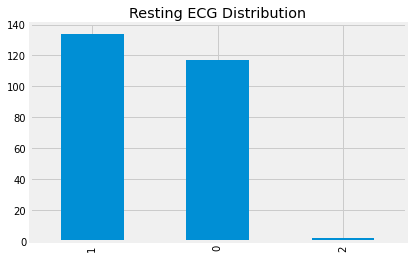

In [24]:
print(df.restecg.value_counts())
df['restecg'].value_counts().plot(kind='bar').set_title('Resting ECG Distribution')

<b>152 have ST-T wave abnormility<br>
147 are normal<br>
4 show probable or definite left ventricular hypertrophy</b>

No     178
Yes     75
Name: exang, dtype: int64


Text(0.5, 1.0, 'Exercise Induced Angina Distribution')

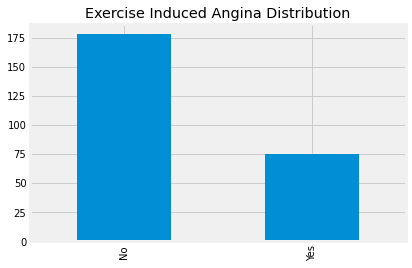

In [25]:
print(df.exang.value_counts())
df['exang'].value_counts().plot(kind='bar').set_title('Exercise Induced Angina Distribution')

0.0    163
1.0     59
2.0     31
Name: ca, dtype: int64


Text(0.5, 1.0, 'Number of Major Vessel Distribution')

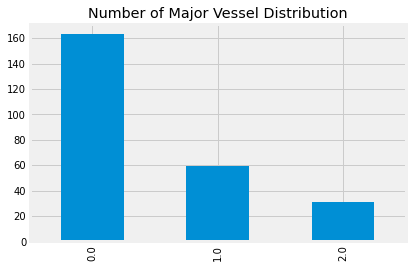

In [26]:
print(df.ca.value_counts())
df['ca'].value_counts().plot(kind='bar').set_title('Number of Major Vessel Distribution')

reversable_defect    151
normal                88
fixed_defect          14
Name: thal, dtype: int64


Text(0.5, 1.0, 'thal Distribution')

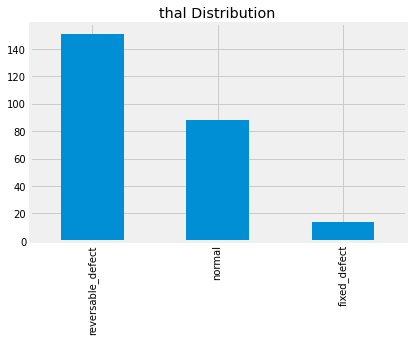

In [27]:
print(df.thal.value_counts())
df['thal'].value_counts().plot(kind='bar').set_title('thal Distribution')

## Visualize categorical data distribution

Text(0.5, 1.0, 'Disease classes according to Sex')

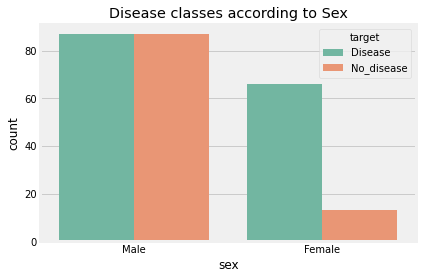

In [28]:
sns.countplot(x='sex', hue='target', data=df, palette='Set2').set_title('Disease classes according to Sex')

Text(0.5, 1.0, 'Disease classes according to Exercise Induced Angina')

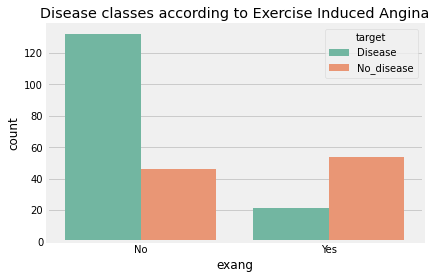

In [29]:
sns.countplot(x='exang', hue='target', data=df, palette='Set2').set_title('Disease classes according to Exercise Induced Angina')

Text(0.5, 1.0, 'Disease classes according to fbs')

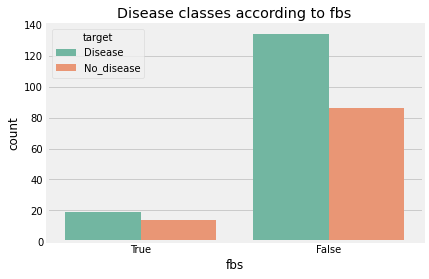

In [30]:
sns.countplot(x='fbs', hue='target', data=df, palette='Set2').set_title('Disease classes according to fbs')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relation of tresbps with target')

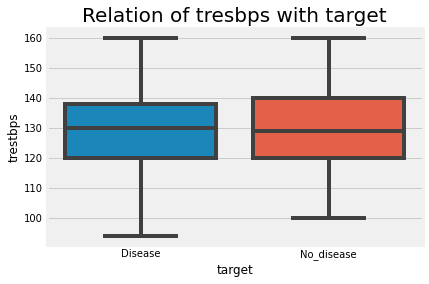

In [31]:
# box plot for tresbps vs target

sns.boxplot(df['target'], df['trestbps'])
plt.title('Relation of tresbps with target', fontsize = 20)

Text(0.5, 1.0, 'Relation of ECG measurement with Target')

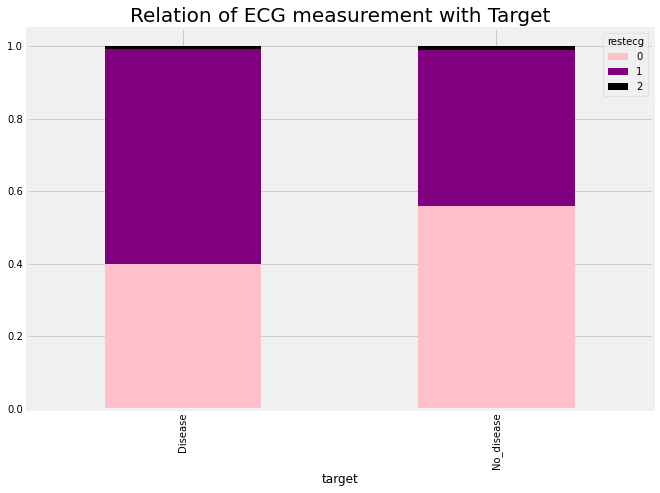

In [32]:
# crosstab plot for Resting electrocardiographic measurement vs target
  
dat = pd.crosstab(df['target'], df['restecg']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7), color = ['pink', 'purple', 'black'])
plt.title('Relation of ECG measurement with Target', fontsize = 20)

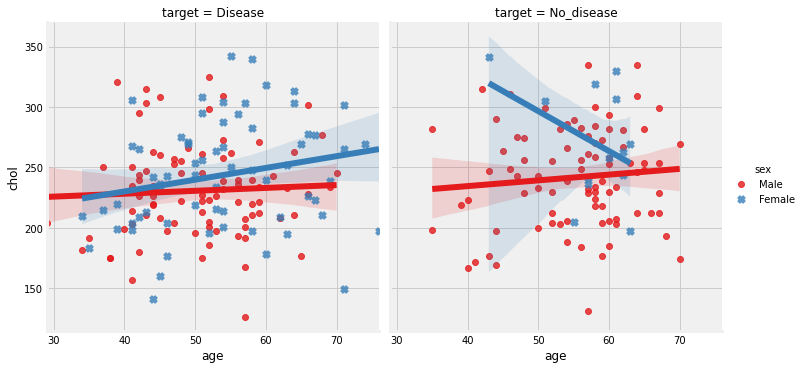

In [33]:
# to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           markers=["o", "x"],
           palette="Set1",
           data=df)
plt.show()